In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
sns.set()

In [2]:
price = pd.read_pickle('./pickle_data/commodity_price.pkl')
# CFTC Hedge Long
long_pos = pd.read_pickle('./pickle_data/long_pos.pkl')
# CFTC Hedge Short
short_pos = pd.read_pickle('./pickle_data/short_pos.pkl')
# CFTC Hedge All
total_pos = pd.read_pickle('./pickle_data/total_pos.pkl')

# CFTC헷져들의 포지션을 내재가치로. 헷저들이 좀 더 잘알고 있다는 전제

In [3]:
price

,CL,HO,XB,NG,SI,GC,HG,SM,C,S,KW,BO,W,SB,CC,KC,CT,LC,LH,FC
2018-01-02,85.33,179.68,149.36,6.087,19.308,1459.12,348.68,294.54,398.6875,913.3125,701.5625,28.63,602.1250,18.76,2161.0,190.08,63.77,193.820,121.182,240.288
2018-01-03,86.98,182.62,152.18,6.001,19.378,1461.88,346.61,295.19,398.6875,917.0625,711.0000,28.93,604.8125,18.78,2130.0,188.00,64.18,194.250,122.113,240.206
2018-01-04,87.48,182.02,152.89,5.759,19.380,1465.20,347.20,296.30,396.5000,916.1250,709.4375,28.90,602.5000,18.72,2130.0,189.36,65.05,193.391,123.206,238.120
2018-01-05,86.78,180.57,151.28,5.620,19.401,1465.97,343.70,298.24,396.5000,919.0000,706.3125,28.81,597.4375,18.55,2119.0,187.71,64.17,188.744,123.165,232.272
2018-01-08,87.22,179.85,151.81,5.675,19.244,1463.87,343.12,297.87,392.3125,915.1875,700.0000,28.62,594.3750,18.25,2139.0,183.05,64.35,186.323,124.339,232.190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-21,82.43,326.15,241.24,7.827,19.480,1675.70,346.70,438.80,690.2500,1467.0000,963.5000,65.00,915.2500,17.81,2345.0,215.10,96.92,150.750,86.450,179.225
2022-09-22,83.03,332.07,243.16,7.193,19.617,1681.10,347.10,428.90,693.2500,1463.2500,975.5000,66.46,922.0000,18.00,2320.0,217.25,96.54,149.350,85.675,177.975
2022-09-23,78.25,315.75,230.81,6.992,18.910,1655.60,334.30,423.30,681.7500,1431.7500,947.2500,63.68,893.7500,17.64,2244.0,214.10,92.54,148.550,82.800,178.350
2022-09-26,76.18,304.64,228.88,7.014,18.480,1633.40,329.45,417.50,670.7500,1416.2500,926.0000,62.46,871.2500,17.62,2234.0,216.50,88.37,147.350,79.400,177.075


In [4]:
long_pos

,CL,HO,XB,NG,SI,GC,HG,SM,C,S,KW,BO,W,SB,CC,KC,CT,LC,LH,FC
2018-01-01,1048440.0,177361.0,146875.0,601536.0,83491.0,231736.0,84748.0,204637.0,823484.0,439344.0,153528.0,229035.0,251708.0,480765.0,149040.0,131048.0,125331.0,145448.0,102373.0,14277.0
2018-01-08,1073796.0,167068.0,137615.0,547096.0,77236.0,238469.0,81707.0,197163.0,817751.0,434020.0,148857.0,213891.0,250433.0,472727.0,149333.0,126327.0,128406.0,147255.0,103778.0,13903.0
2018-01-15,1118445.0,184945.0,150447.0,539687.0,75403.0,232674.0,77894.0,196697.0,836466.0,456403.0,137175.0,219078.0,251212.0,475419.0,153631.0,123066.0,128265.0,146207.0,101490.0,14311.0
2018-01-22,1132354.0,194745.0,166059.0,495465.0,76137.0,256511.0,78482.0,209431.0,859363.0,479883.0,137983.0,223430.0,272692.0,516595.0,153359.0,138268.0,144180.0,148692.0,99564.0,15021.0
2018-01-29,1089755.0,193635.0,175750.0,482248.0,80278.0,261255.0,75029.0,214283.0,888521.0,488979.0,141493.0,243740.0,274897.0,570292.0,150818.0,143582.0,149256.0,149536.0,99305.0,14847.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-29,792945.0,157001.0,127731.0,411747.0,68235.0,166671.0,87336.0,183934.0,742904.0,357570.0,77781.0,234414.0,160670.0,476438.0,163756.0,105675.0,119068.0,103953.0,87648.0,16141.0
2022-09-05,789359.0,147889.0,120915.0,411652.0,62405.0,160686.0,85369.0,182103.0,694505.0,358292.0,72495.0,216669.0,136789.0,468991.0,158988.0,99883.0,120927.0,106399.0,90960.0,15309.0
2022-09-12,795705.0,152123.0,117021.0,416779.0,59815.0,168834.0,85353.0,185228.0,689939.0,360708.0,72436.0,219572.0,138757.0,477609.0,166251.0,101931.0,122252.0,108411.0,94662.0,15046.0
2022-09-19,797515.0,162370.0,122729.0,419405.0,56432.0,167240.0,82265.0,175846.0,691975.0,375054.0,72250.0,217747.0,140651.0,475528.0,169313.0,107042.0,123717.0,110525.0,84725.0,16137.0


In [15]:
# 원자재 밸류 팩터 전략 구현 클래스
class CommodityValue:
    
    # 초기화 함수
    def __init__(self, price, long_pos, short_pos, total_pos):
        
        # 가격 데이터
        self.price = price
        
        # 포지션 데이터
        # CFTC Hedger 롱포지션
        self.long_pos = long_pos
        
        # CFTC Hedger 숏포지션
        self.short_pos = short_pos
        
        # CFTC 전체포지션
        self.total_pos = total_pos

        # 롱숏 개수, 절반 롱 절반 숏
        self.n = int(len(self.price.columns) / 2)
        
        # 룩백 윈도우
        self.lookback = 52
        
        # 투자 가중치
        self.weights = self.calculate_weights(self.long_pos, self.short_pos, self.total_pos, self.lookback)
        
        # 거래비용
        self.cost = 0.0005
                
        # 포트폴리오 자산별 수익률
        self.port_rets = self.calculate_returns(self.price, self.weights, self.cost)
        self.port_rets.dropna(inplace=True)
        
        # 샤프비율
        self.sharpe_ratio = self.calculate_sharpe_ratio(self.port_rets)
        
        # 포트폴리오 백테스팅 결과 시각화
        self.plot_port_returns(self.port_rets)
    
    # 투자 가중치 계산 함수
    def calculate_weights(self, long_pos, short_pos, total_pos, lookback=52):
        
        # 롱숏 헤징 강도 레인지
        long_hedging = long_pos / total_pos # 
        short_hedging = short_pos / total_pos
        #과거 1년 대비 어느정도인지 (분자 : 현재  현재-미니멈 / 분모 : 전체 맥스-미니멈)
        long_hedging_range = (long_hedging - long_hedging.rolling(lookback).min()) / (long_hedging.rolling(lookback).max() - long_hedging.rolling(lookback).min())
        short_hedging_range = (short_hedging - short_hedging.rolling(lookback).min()) / (short_hedging.rolling(lookback).max() - short_hedging.rolling(lookback).min())
                                
        # 롱숏 랭크
        long_rank = long_hedging_range.rank(axis=1)
        short_rank = short_hedging_range.rank(axis=1)
        
        # 투자 가중치
        long_weights = (long_rank > self.n) * (1/self.n) # 숫자 큰애들이 쎈거임 (not asc) = (1/self.n) ; 동일가중으로 투자
        short_weights = (short_rank > self.n) * -(1/self.n) # - 숏
        total_weights = long_weights + short_weights

        return total_weights

    # 수익률 계산
    def calculate_returns(self, price, weights, cost):
        
        # 일별 수익률
        rets = price.pct_change()

        # 가중치 (가중치가 주간으로 들어옴) 이걸 일간화
        weights = weights.reindex_like(price)
        weights.ffill(inplace=True) #휴일은 전일자로 

        # 포트폴리오 수익률
        port_rets = (weights.shift() * rets - abs(weights.diff()) * cost)

        return port_rets.sum(axis=1)
    
    # 샤프비율 계산
    def calculate_sharpe_ratio(self, total_returns):
        sharpe_ratio = total_returns.mean() * np.sqrt(252) / total_returns.std()
        return sharpe_ratio
    
    # 백테스팅 결과 시각화
    def plot_port_returns(self, rets):
        plt.figure(figsize=(12, 6))
        rets.cumsum().plot(label='port')
        plt.show()

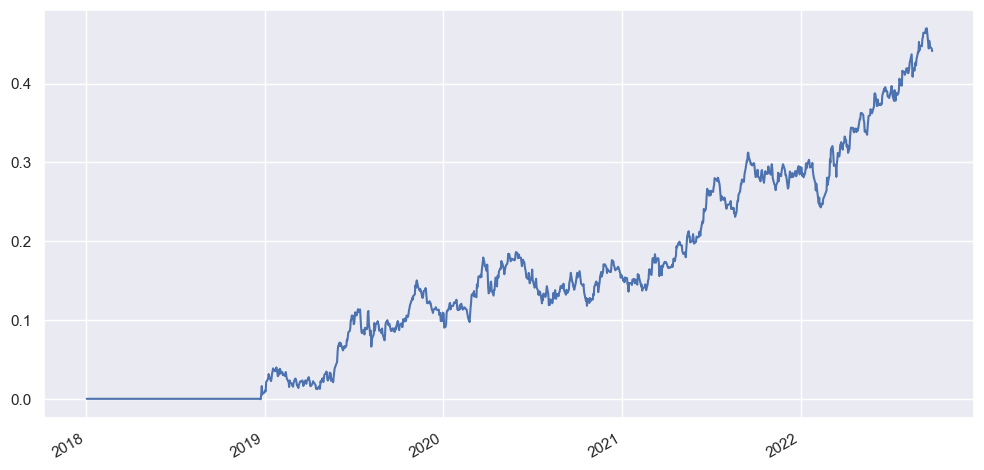

In [16]:
# 백테스팅 실행
value = CommodityValue(price, long_pos, short_pos, total_pos)

In [17]:
value.sharpe_ratio

1.1094498381317706